# Load Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.loadtxt('sample_data/mnist_train_small.csv', delimiter=',')

In [ ]:
y = data[:, 0]
X = data[:, 1:]

# Shuffle and Split

In [ ]:
np.random.permutation(10)

array([0, 6, 3, 4, 7, 5, 1, 2, 9, 8])

In [ ]:
def unison_shuffle(a, b):
    inx = np.random.permutation(a.shape[0])
    return a[inx], b[inx]

In [ ]:
X, y = unison_shuffle(X, y)

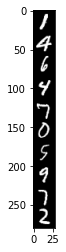

In [ ]:
plt.imshow(X[10:20].reshape(280, 28), cmap='gray')

In [ ]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
X_val = X[split:]

y_train = y[:split]
y_val = y[split:]

In [ ]:
X_train = X_train / 255.
X_val = X_val / 255.

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)

# Model


In [ ]:
model = Sequential()

model.add(Dense(200, activation='relu', input_dim=784))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=30, validation_data=(X_val, Y_val))

Epoch 1/30
500/500 [==============================] - 1s 2ms/step - loss: 2.0390e-04 - acc: 1.0000 - val_loss: 0.1759 - val_acc: 0.9670
Epoch 2/30
500/500 [==============================] - 1s 2ms/step - loss: 1.5606e-04 - acc: 1.0000 - val_loss: 0.1778 - val_acc: 0.9688
Epoch 3/30
500/500 [==============================] - 1s 2ms/step - loss: 1.2466e-04 - acc: 1.0000 - val_loss: 0.1794 - val_acc: 0.9663
Epoch 4/30
500/500 [==============================] - 1s 3ms/step - loss: 1.0571e-04 - acc: 1.0000 - val_loss: 0.1812 - val_acc: 0.9670
Epoch 5/30
500/500 [==============================] - 1s 2ms/step - loss: 8.7035e-05 - acc: 1.0000 - val_loss: 0.1838 - val_acc: 0.9678
Epoch 6/30
500/500 [==============================] - 1s 2ms/step - loss: 7.6363e-05 - acc: 1.0000 - val_loss: 0.1829 - val_acc: 0.9680
Epoch 7/30
500/500 [==============================] - 1s 2ms/step - loss: 6.5639e-05 - acc: 1.0000 - val_loss: 0.1842 - val_acc: 0.9680
Epoch 8/30
500/500 [============================

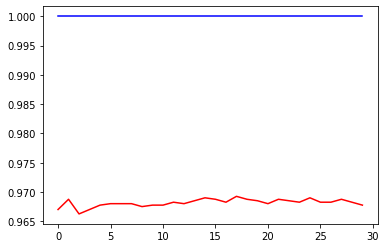

In [ ]:
plt.plot(history.history['acc'], 'b-')
plt.plot(history.history['val_acc'], 'r-')

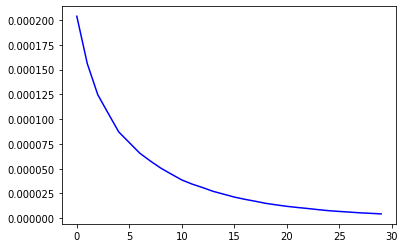

In [ ]:
plt.plot(history.history['loss'], 'b-')
# plt.plot(history.history['val_loss'], 'r-')